In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import shapiro
import seaborn as sns
import time
from datetime import datetime as dt
import numpy
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [3]:
train = pd.read_csv( '/Users/Andrew/Downloads/restaurant-revenue-prediction/train.csv.zip')
test = pd.read_csv('/Users/Andrew/Downloads/restaurant-revenue-prediction/test.csv.zip')

In [4]:
test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [5]:
data = pd.concat((train.loc[:, "Open Date" : "P37"],
                  test.loc[:, "Open Date" : "P37"]), ignore_index=True)

In [6]:
train_idx = len(train)
test_idx = len(data) - len(test)

In [7]:
print('The shape of our training set: %s and the number of features:%s'%(train.shape[0], train.shape[1]))
print('The shape of our testing set: %s and the number of features:%s' %(test.shape[0], test.shape[1]))

The shape of our training set: 137 and the number of features:43
The shape of our testing set: 100000 and the number of features:42


In [8]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [9]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [10]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100137 entries, 0 to 100136
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Open Date   100137 non-null  object 
 1   City        100137 non-null  object 
 2   City Group  100137 non-null  object 
 3   Type        100137 non-null  object 
 4   P1          100137 non-null  int64  
 5   P2          100137 non-null  float64
 6   P3          100137 non-null  float64
 7   P4          100137 non-null  float64
 8   P5          100137 non-null  int64  
 9   P6          100137 non-null  int64  
 10  P7          100137 non-null  int64  
 11  P8          100137 non-null  int64  
 12  P9          100137 non-null  int64  
 13  P10         100137 non-null  int64  
 14  P11         100137 non-null  int64  
 15  P12         100137 non-null  int64  
 16  P13         100137 non-null  float64
 17  P14         100137 non-null  int64  
 18  P15         100137 non-null  int64  
 19  P1

In [12]:
df_cat = train[['Open Date', 'City', 'City Group', 'Type']]
df_num =train[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue']]

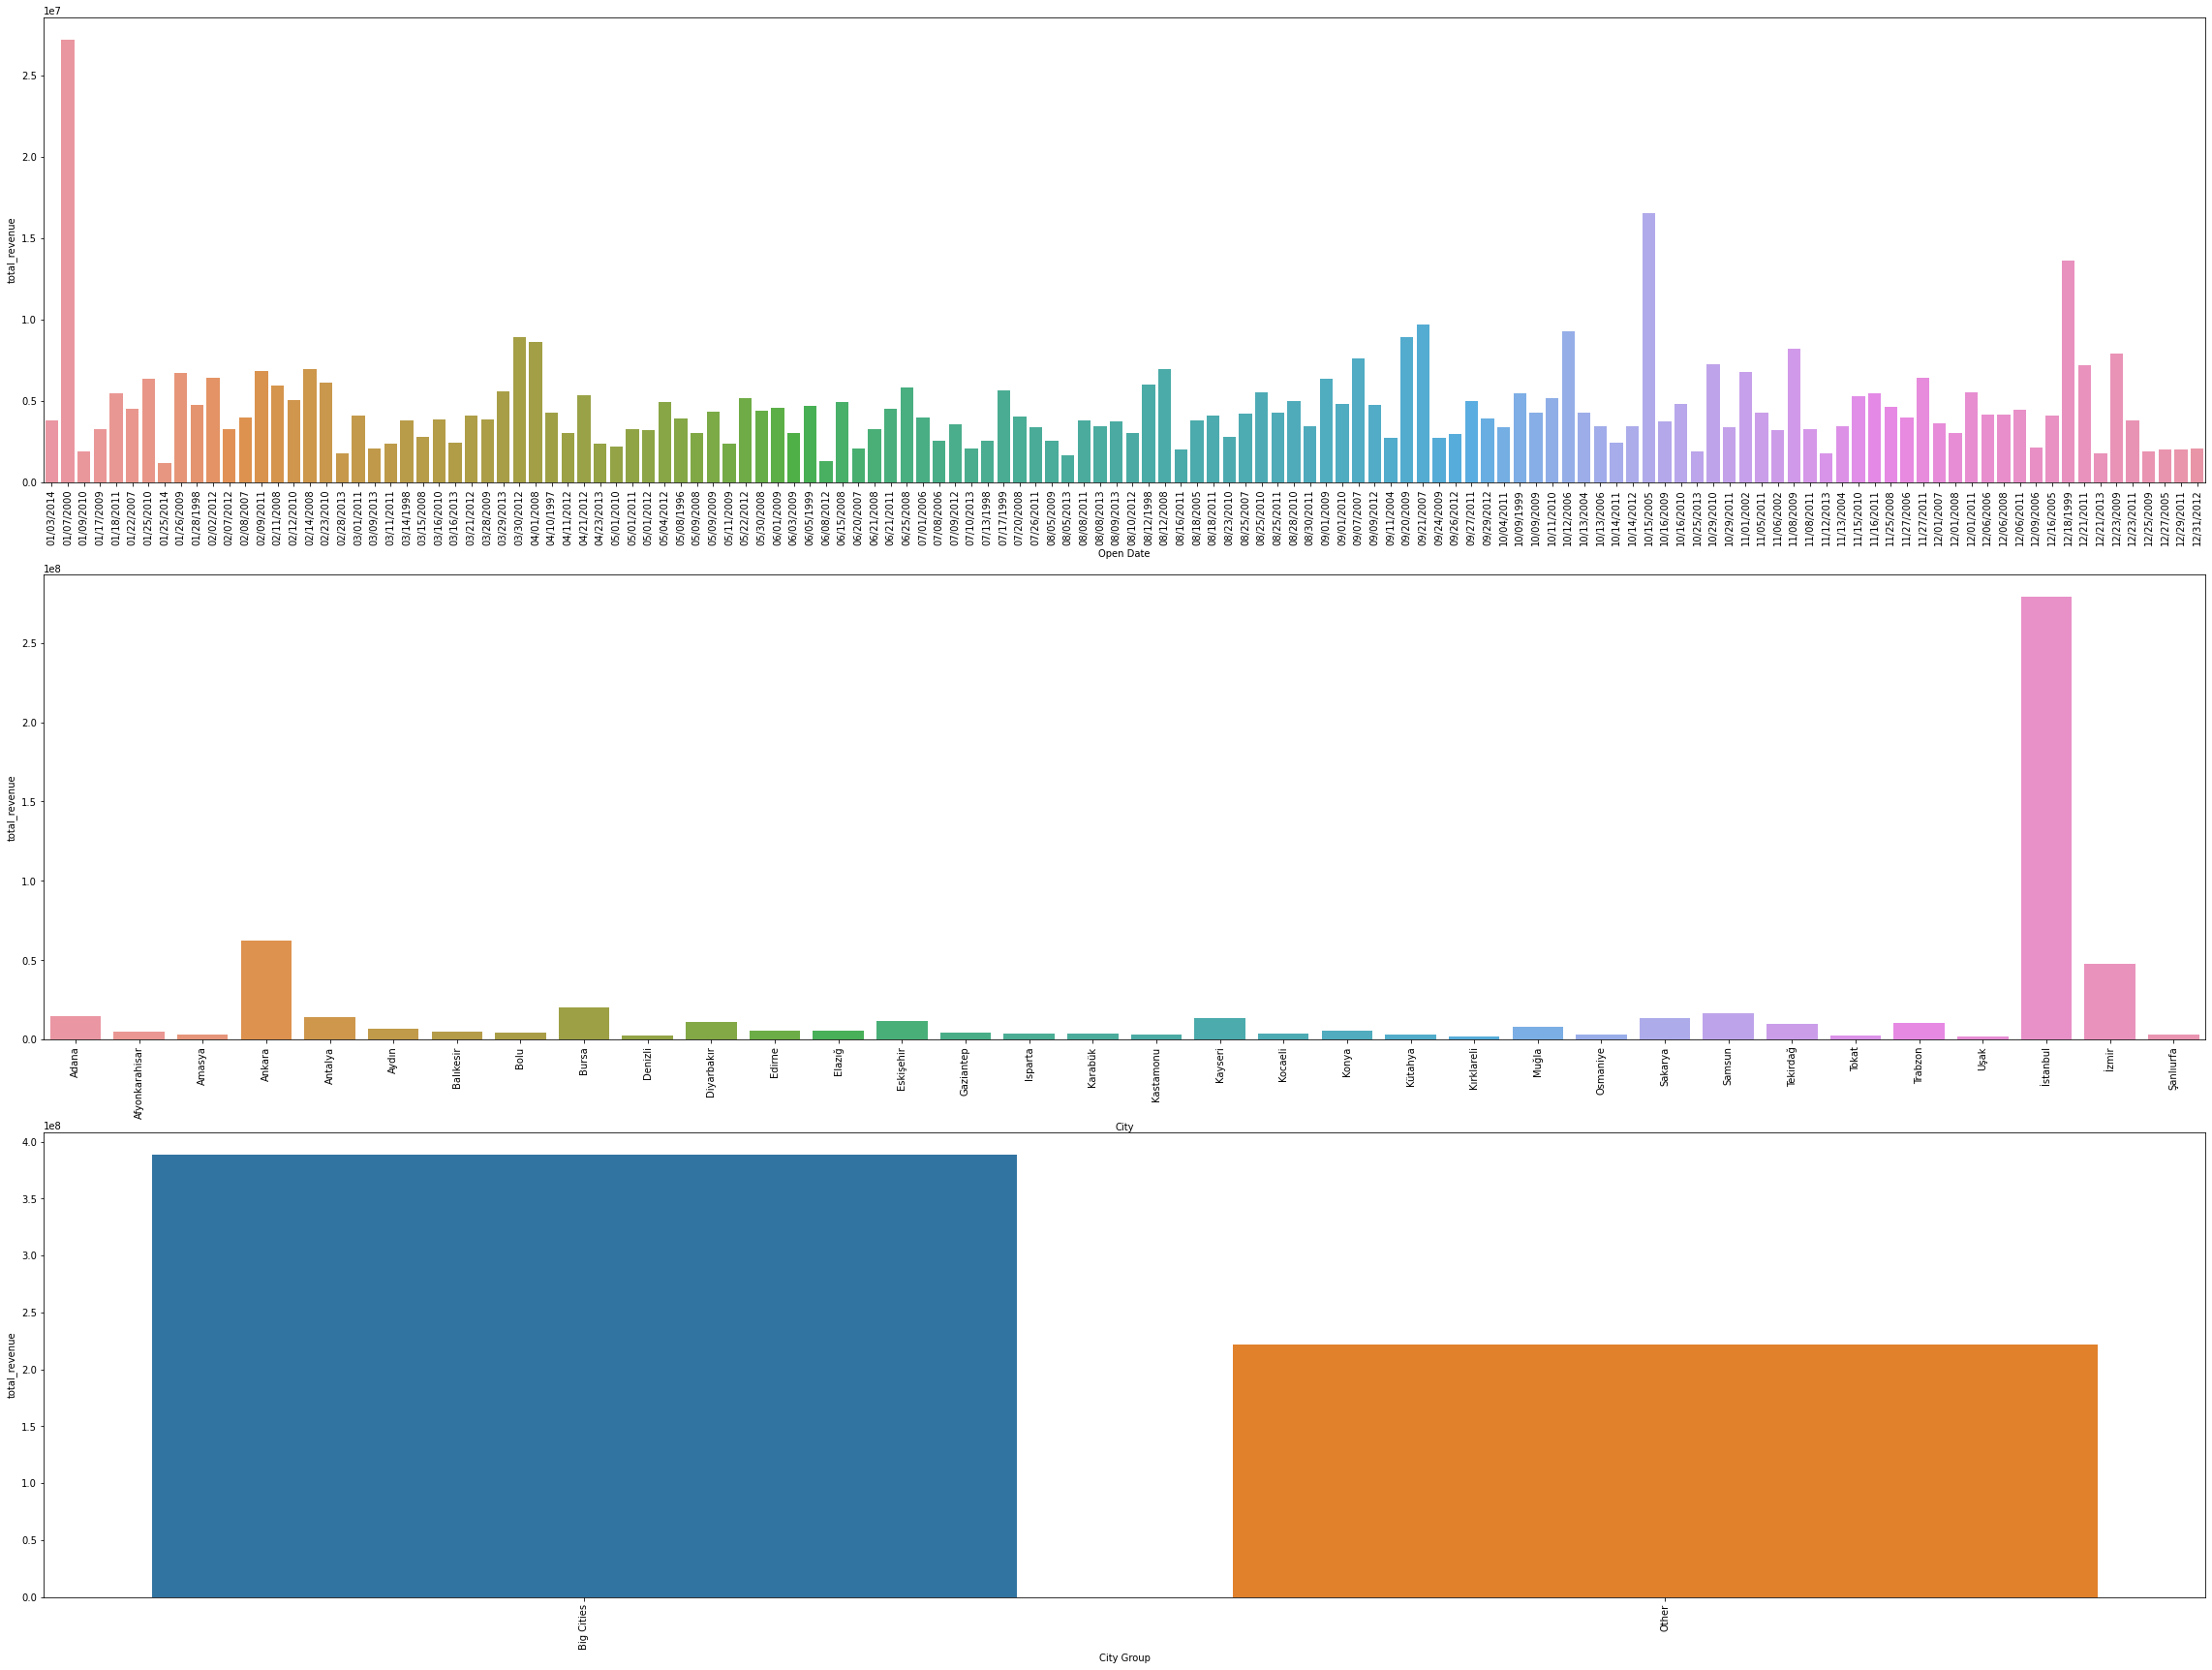

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(df_cat, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

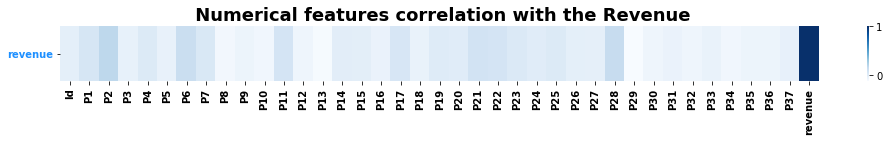

In [14]:
num=train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['revenue'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the Revenue", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


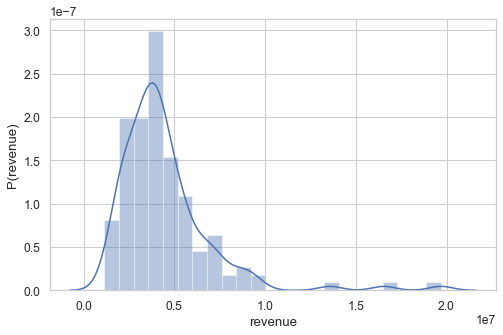

In [15]:
print(train['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train['revenue'], norm_hist=False, kde=True
).set(xlabel='revenue', ylabel='P(revenue)');

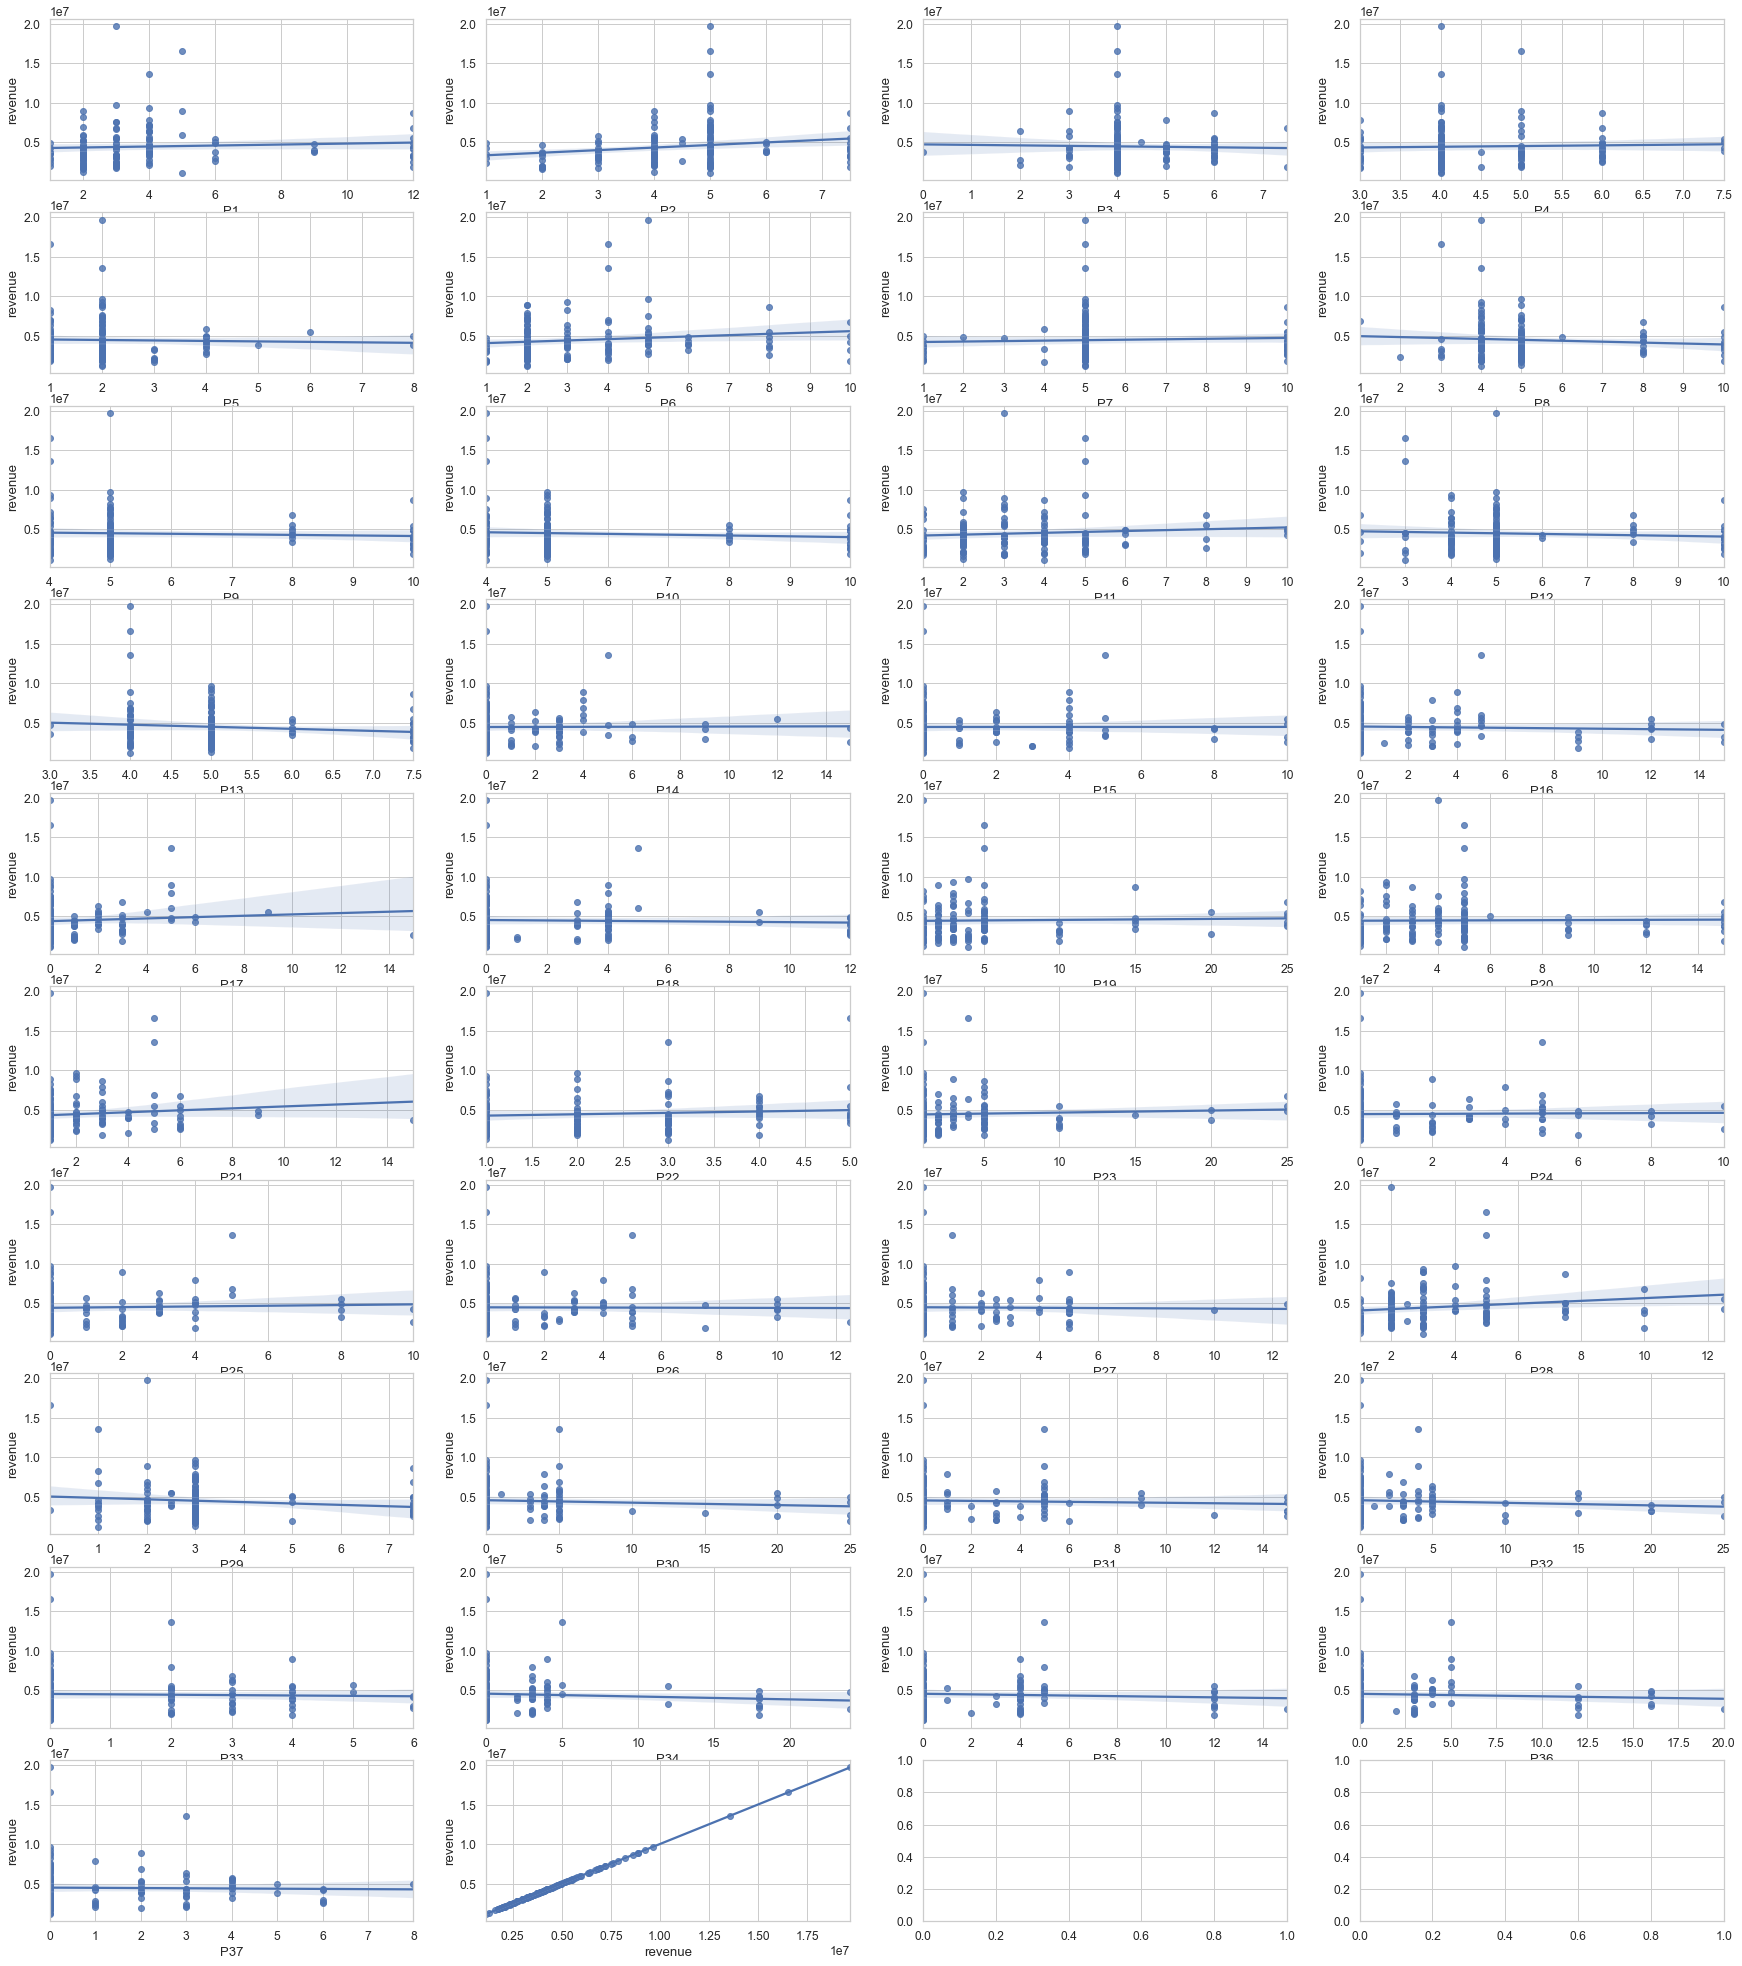

In [16]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(df_num, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)

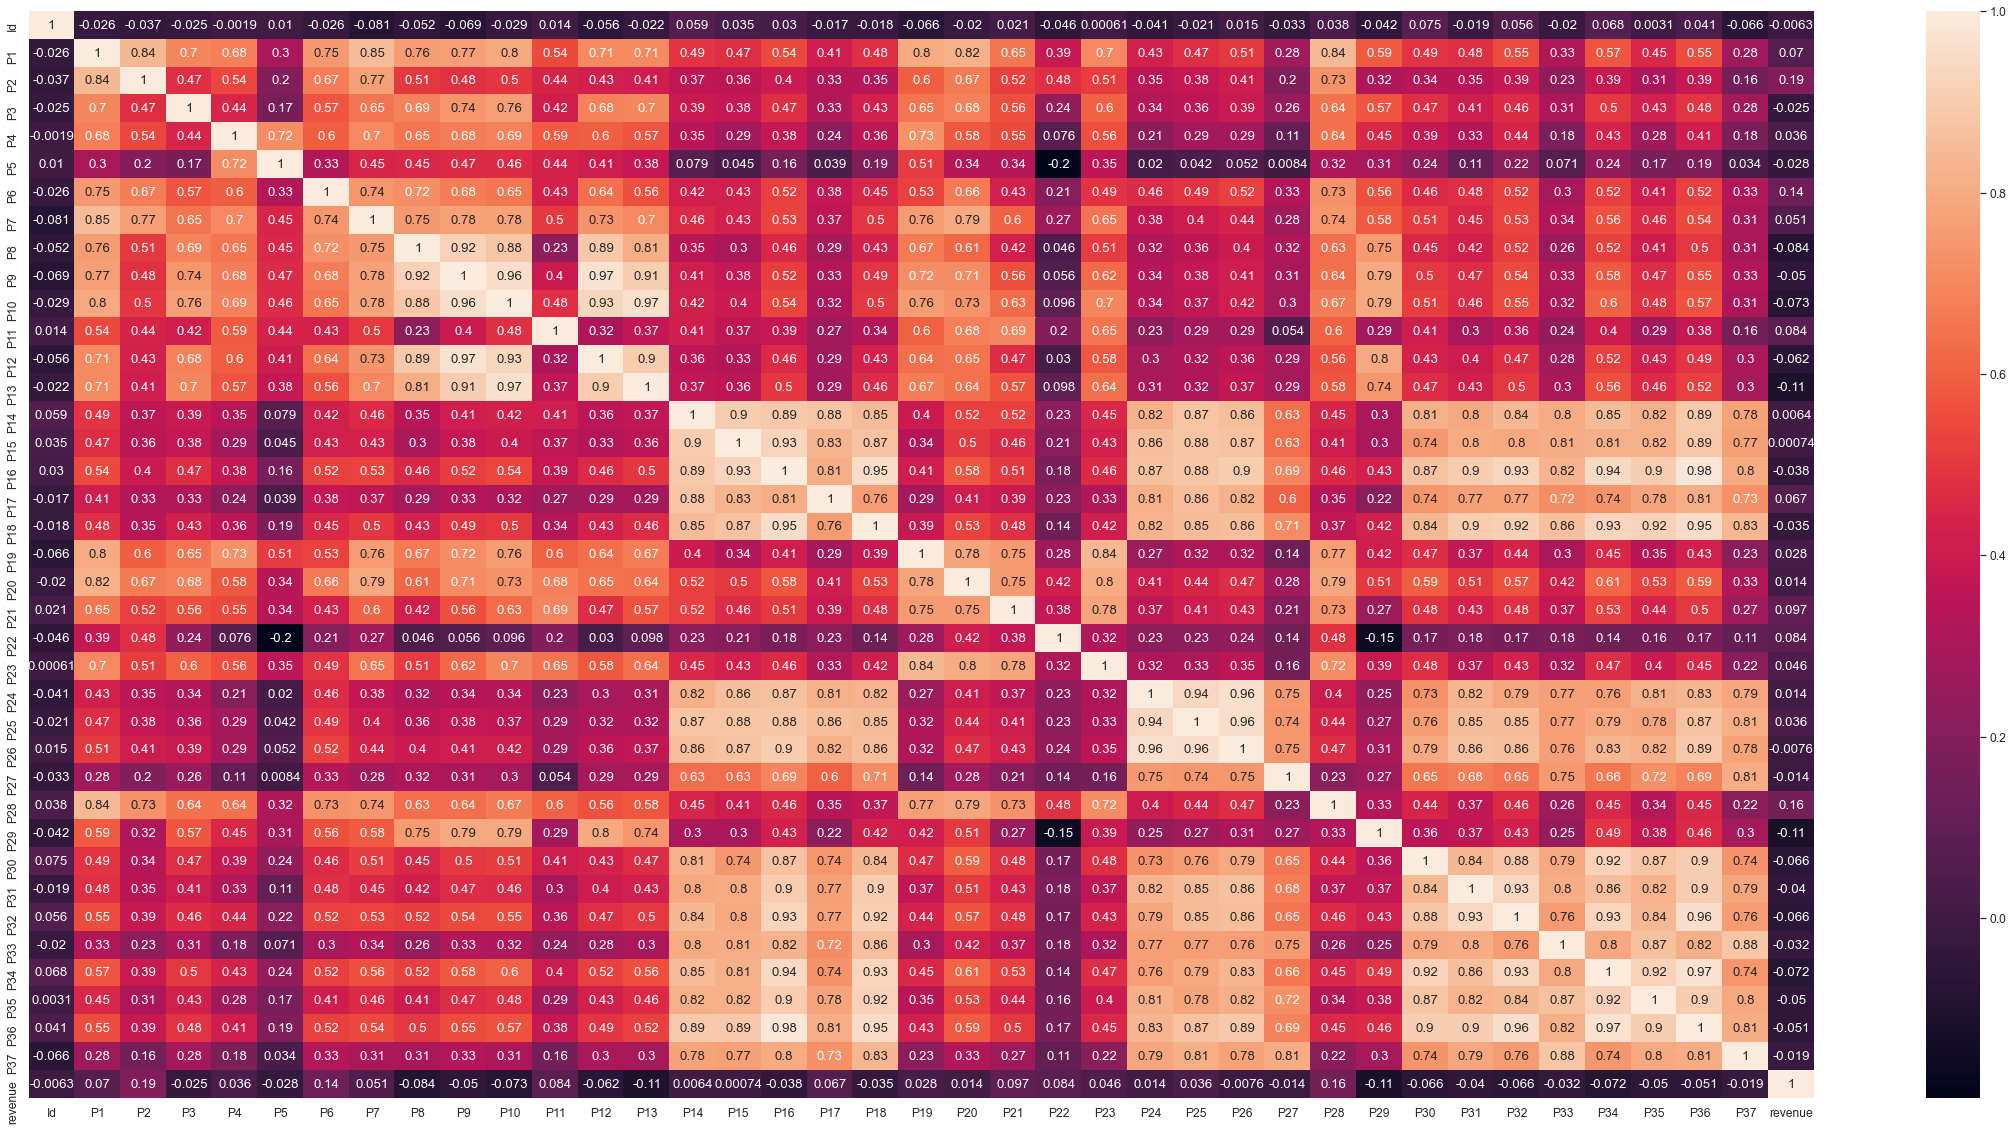

In [17]:
plt.figure(figsize=(40,20))
sns.heatmap(train.corr(),annot=True)

In [18]:
Num=numcorr['revenue'].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("red", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s


,revenue
revenue,1.000000
P2,0.191518
P28,0.155534
P6,0.139094
P21,0.097411
P11,0.084247
P22,0.083562
P1,0.070217
P17,0.067137
P7,0.051165


In [19]:
num2=data.select_dtypes(exclude='object')
numcorr2=num2.corr()

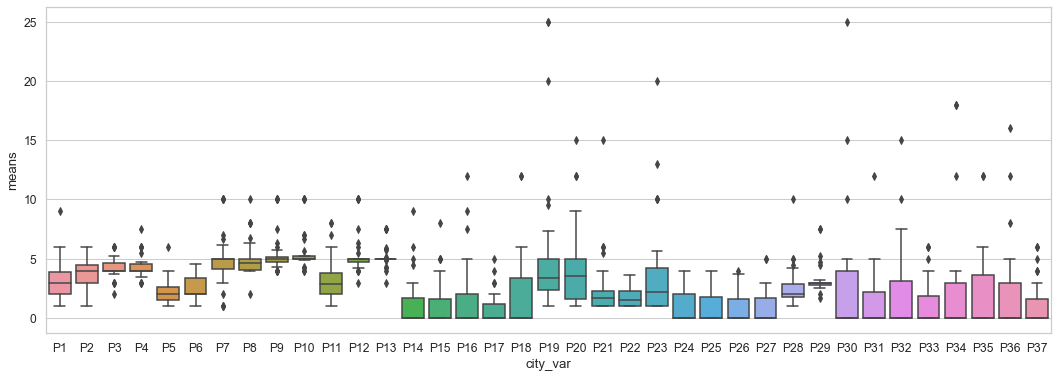

In [20]:
# Plotting mean of P-variables over each city helps us see which P-variables are highly related to City
# since we are given that one class of P-variables is geographical attributes.
distinct_cities = train.loc[:, "City"].unique()

# Get the mean of each p-variable for each city
means = []
for col in train.columns[5:42]:
    temp = []
    for city in distinct_cities:
        temp.append(train.loc[train.City == city, col].mean())     
    means.append(temp)
    
# Construct data frame for plotting
city_pvars = pd.DataFrame(columns=["city_var", "means"])
for i in range(37):
    for j in range(len(distinct_cities)):
        city_pvars.loc[i+37*j] = ["P"+str(i+1), means[i][j]]
#print(city_pvars)        
# Plot boxplot
plt.rcParams['figure.figsize'] = (18.0, 6.0)
sns.boxplot(x="city_var", y="means", data=city_pvars)

In [21]:
# K Means treatment for city
def adjust_cities(data, train, k):
    
    # As found by box plot of each city's mean over each p-var
    relevant_pvars =  ["P1", "P2", "P11", "P19", "P20", "P23", "P30"]
    train = train.loc[:, relevant_pvars]
    
    # Optimal k is 20 as found by DB-Index plot    
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(train)
    
    # Get the cluster centers and classify city of each data instance to one of the centers
    data['City Cluster'] = kmeans.predict(data.loc[:, relevant_pvars])
    del data["City"]
    
    return data

def one_hot_ecoding(data,col,pref):
    # One hot encode City Group
    data = data.join(pd.get_dummies(data[col], prefix=pref))
    # Since only n-1 columns are needed to binarize n categories, drop one of the new columns.  
    # And drop the original columns.
    data = data.drop([col], axis=1)
    return data 

In [22]:
# train
all_diff = []
for date in data["Open Date"]:
    diff = dt.now() - dt.strptime(date, "%m/%d/%Y")
    all_diff.append(int(diff.days/1000))

data['Days_from_open'] = pd.Series(all_diff)
print(data.head())

    Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  ...  \
0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...   
1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...   
2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3  ...   
3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...   
4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37  Days_from_open  
0  3.0    5    3    4    5    5    4    3    4               7  
1  3.0    0    0    0    0    0    0    0    0               4  
2  3.0    0    0    0    0    0    0    0    0               2  
3  7.5   25   12   10    6   18   12   12    6               3  
4  3.0    5    1    3    2    3    4    3    3               4  

[5 rows x 42 columns]


In [23]:
data = data.drop('Open Date', axis=1)

In [24]:
# Convert unknown cities in test data to clusters based on known cities using KMeans
data = adjust_cities(data, train, 20)
data = one_hot_ecoding(data,'City Group',"CG")
data = one_hot_ecoding(data,'Type',"T")

In [25]:
#Count distinct values for each column in Data frame
data.apply(lambda x: len(x.unique()))# Scale all input features to between 0 and 1.

P1                 9
P2                 9
P3                 8
P4                 7
P5                 7
P6                 8
P7                 7
P8                 8
P9                 5
P10                4
P11                8
P12                7
P13                5
P14               10
P15                9
P16               10
P17               10
P18                9
P19                9
P20                9
P21                9
P22                5
P23                9
P24                9
P25                9
P26               10
P27               10
P28                9
P29                8
P30               10
P31               10
P32               10
P33                7
P34               11
P35                8
P36               10
P37                8
Days_from_open     8
City Cluster      20
CG_Big Cities      2
CG_Other           2
T_DT               2
T_FC               2
T_IL               2
T_MB               2
dtype: int64

In [26]:
# Scale all input features to between 0 and 1.
min_max_scaler = MinMaxScaler()
data = pd.DataFrame(data=min_max_scaler.fit_transform(data),
                    columns=data.columns, index=data.index)

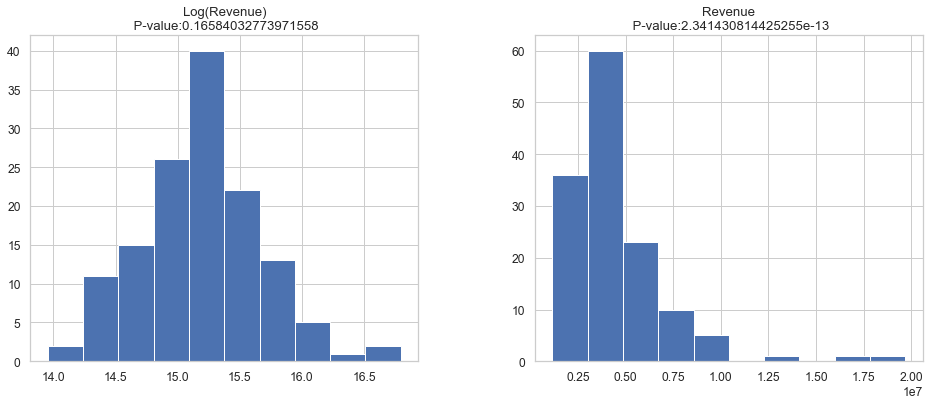

In [27]:
#Revenue Distribution of Train Set
#Check distribution of revenue and log(revenue) (Other Transformation could be Sqrt Transformation)
plt.rcParams['figure.figsize'] = (16.0, 6.0)
pvalue_before = shapiro(train["revenue"])[1]
pvalue_after = shapiro(np.log(train["revenue"]))[1]
graph_data = pd.DataFrame(
        {
            ("Revenue\n P-value:" + str(pvalue_before)) : train["revenue"],
            ("Log(Revenue)\n P-value:" + str(pvalue_after)) : np.log(train["revenue"])
        }
    )
graph_data.hist()

#Shapiro Wilks test for normality
# log transform revenue as it is approximately normal. If this distribution for revenue holds in the test set,
# log transforming the variable before training models will improve performance vastly.
# However, we cannot be completely certain that this distribution will hold in the test set.
train["revenue"] = np.log(train["revenue"])

In [28]:
num_train = train.shape[0]
num_test = test.shape[0]
print(num_train, num_test)

137 100000


In [29]:
train_processed = data[:num_train]
test_processed = data[num_train:]
# check the shapes 
print("Train :",train.shape)
print("Test:",test.shape)

Train : (137, 43)
Test: (100000, 42)


In [30]:
test_processed.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P36,P37,Days_from_open,City Cluster,CG_Big Cities,CG_Other,T_DT,T_FC,T_IL,T_MB
137,0.000000,0.461538,0.533333,0.363636,0.000000,0.111111,0.444444,0.333333,0.166667,0.166667,...,0.0,0.0,0.142857,0.105263,0.0,1.0,0.0,1.0,0.0,0.0
138,0.142857,0.461538,0.533333,0.363636,0.142857,0.111111,0.444444,0.222222,0.000000,0.000000,...,0.0,0.0,0.142857,0.421053,0.0,1.0,0.0,0.0,1.0,0.0
139,0.142857,0.461538,0.533333,0.363636,0.142857,0.111111,0.444444,0.333333,0.000000,0.166667,...,0.0,0.0,0.000000,0.105263,1.0,0.0,0.0,1.0,0.0,0.0
140,0.071429,0.461538,0.533333,0.363636,0.142857,0.222222,0.444444,0.333333,0.166667,0.000000,...,0.0,0.0,0.000000,0.421053,0.0,1.0,0.0,0.0,1.0,0.0
141,0.071429,0.461538,0.533333,0.363636,0.000000,0.111111,0.444444,0.333333,0.166667,0.000000,...,0.0,0.0,0.000000,0.947368,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
X_train_final=train_processed
y_train_final=train['revenue']

In [32]:
#splitting the dataset as training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train_final)

#building the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#Accuracy
print("R-Squared Value for Training Set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared Value for Test Set: {:.3f}".format(linreg.score(X_test, y_test)))

R-Squared Value for Training Set: 0.483
R-Squared Value for Test Set: -1.450


In [33]:
knnreg = KNeighborsRegressor(n_neighbors = 2)
knnreg.fit(X_train, y_train)

print('R-squared train score: {:.3f}'.format(knnreg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

R-squared train score: 0.543
R-squared test score: 0.054


In [34]:
ridge = Ridge()
ridge.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(ridge.score(X_test, y_test)))

R-squared score (training): 0.284
R-squared score (test): 0.071


In [35]:
lasso = Lasso(max_iter = 10000)
lasso.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(X_test, y_test)))

R-squared score (training): 0.000
R-squared score (test): -0.061


In [36]:
lasso = Lasso(alpha=100, max_iter = 10000)
lasso.fit(train_processed, train['revenue'])
results = lasso.predict(test_processed)
results_2= np.exp(results)
print(results_2)

[3941975.68112035 3941975.68112035 3941975.68112035 ... 3941975.68112035
 3941975.68112035 3941975.68112035]


In [37]:
from sklearn.svm import SVR

svr = SVR(C=1, epsilon=0.1)
svr.fit(train_processed,train['revenue'])
results_svm = svr.predict(test_processed)
results_svm_exp = np.exp(results_svm)
print(results_svm_exp)

[3606089.05372378 2830010.61200473 3156546.87977858 ... 4017279.10575852
 4725845.33419148 3553221.49627538]


In [38]:
output = pd.DataFrame({'Id': test.Id, 'Prediction': results_svm_exp })

output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
print(output)

Your submission was successfully saved!
          Id    Prediction
0          0  3.606089e+06
1          1  2.830011e+06
2          2  3.156547e+06
3          3  2.963193e+06
4          4  4.929211e+06
...      ...           ...
99995  99995  4.699656e+06
99996  99996  2.959160e+06
99997  99997  4.017279e+06
99998  99998  4.725845e+06
99999  99999  3.553221e+06

[100000 rows x 2 columns]
